Mean Squared Error: 7.406388346987072


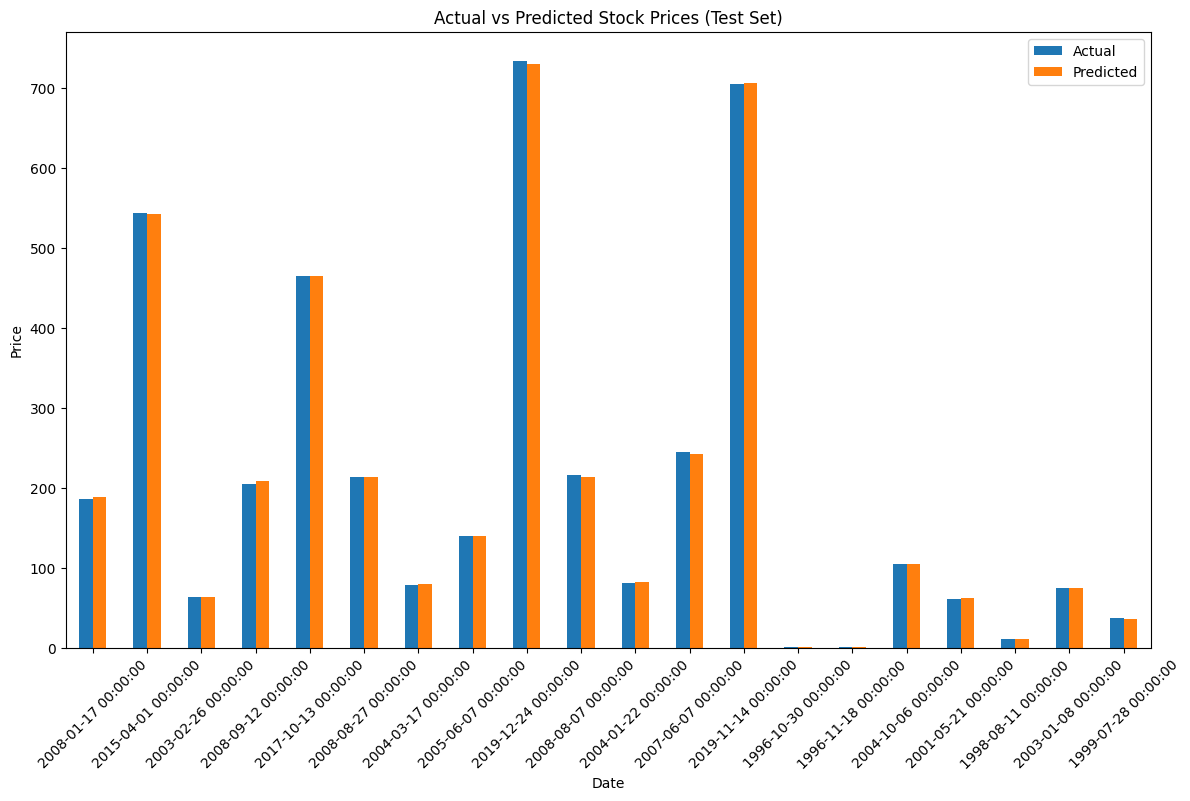

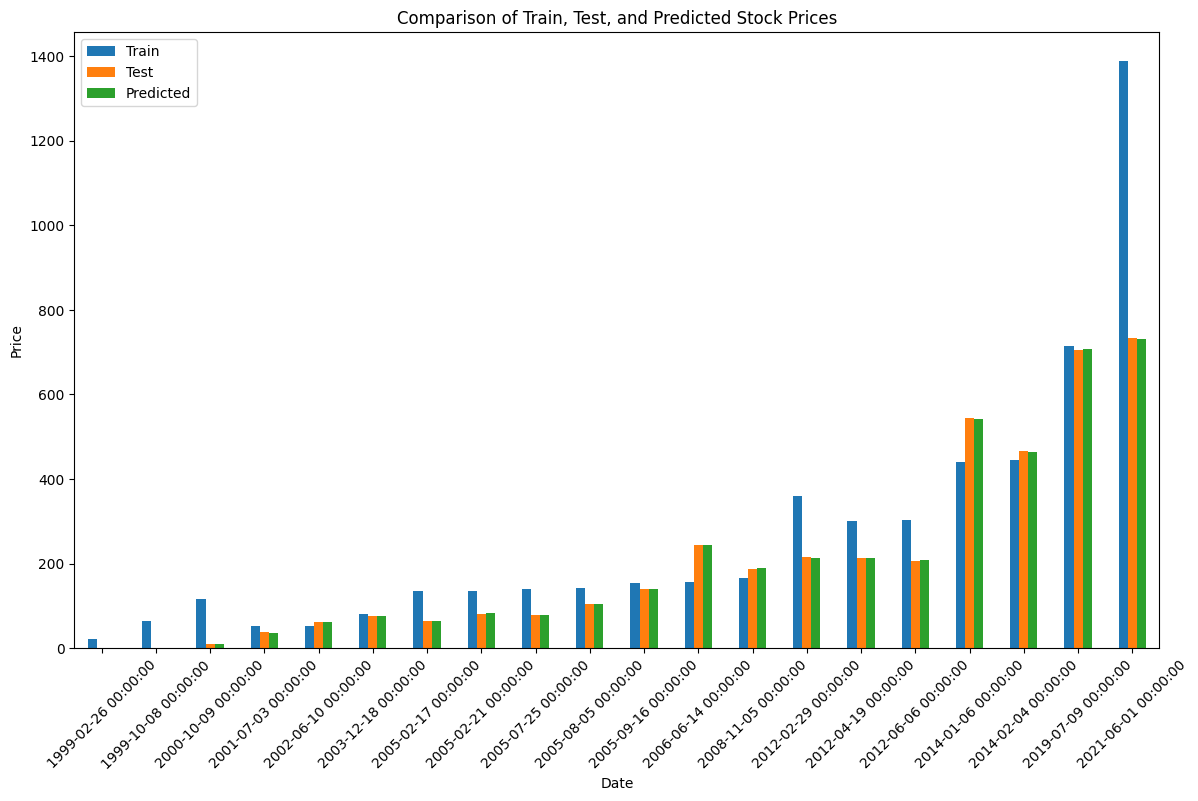

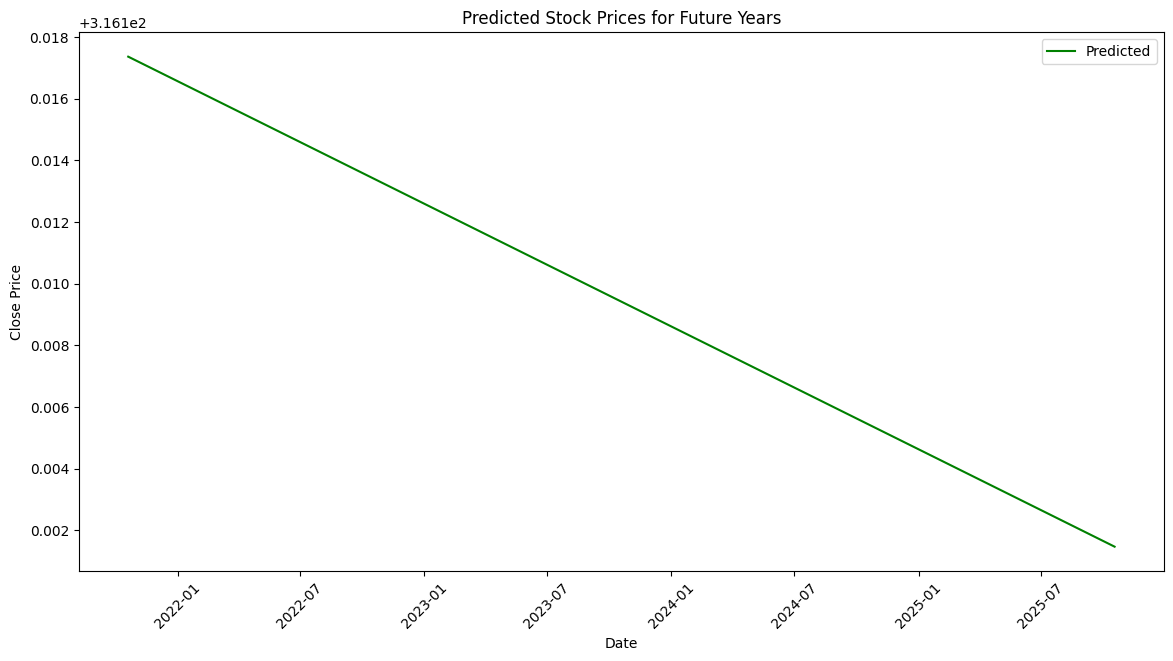

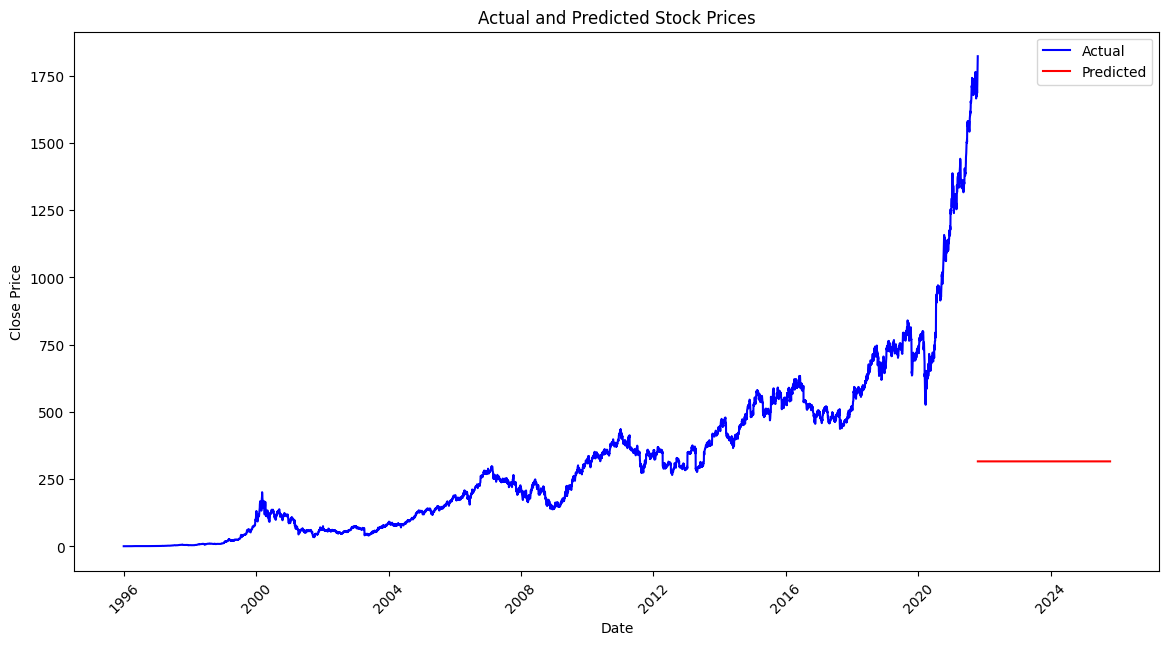

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Step 1: Load and preprocess the data
file_path = r'C:\Users\anu\Downloads\archive (3)\INFY.NS.csv'
df = pd.read_csv(file_path)

# Handle missing values
df.fillna(method='ffill', inplace=True)

# Convert Date to datetime and create a numerical feature for days since the start
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['Days'] = (df['Date'] - df['Date'].min()).dt.days

# Extract features and target
X = df[['Open', 'High', 'Low', 'Volume', 'Days']]
y = df['Close']

# Impute missing values in features
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test, dates_train, dates_test = train_test_split(
    X, y, df['Date'], test_size=0.2, random_state=42
)

# Step 2: Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 3: Make predictions
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Step 4: Plot actual vs predicted prices with dates
comparison_df = pd.DataFrame({'Date': dates_test, 'Actual': y_test, 'Predicted': y_pred}).reset_index(drop=True)
comparison_df.head(20).plot(x='Date', y=['Actual', 'Predicted'], kind='bar', figsize=(14, 8))
plt.title('Actual vs Predicted Stock Prices (Test Set)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

# Step 5: Bar graph comparing train, test, and predicted prices
train_df = pd.DataFrame({'Date': dates_train, 'Close': y_train}).reset_index(drop=True)
test_df = pd.DataFrame({'Date': dates_test, 'Close': y_test, 'Predicted': y_pred}).reset_index(drop=True)

train_sample = train_df.sample(20, random_state=42).sort_values(by='Date').reset_index(drop=True)
test_sample = test_df.head(20).sort_values(by='Date').reset_index(drop=True)

# Ensure Date column is aligned for plotting
combined_df = pd.concat([train_sample, test_sample], axis=1)
combined_df.columns = ['Date_Train', 'Train', 'Date_Test', 'Test', 'Predicted']
combined_df['Date'] = combined_df['Date_Train'].combine_first(combined_df['Date_Test'])

combined_df.plot(x='Date', y=['Train', 'Test', 'Predicted'], kind='bar', figsize=(14, 8))
plt.title('Comparison of Train, Test, and Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

# Step 6: Predict future stock prices for the next four years (2022-2025)
last_known_date = df['Date'].max()
future_dates = [last_known_date + timedelta(days=i) for i in range(1, 1461)]
future_days = [(date - df['Date'].min()).days for date in future_dates]

# Generate future data frame with average values for other features
average_values = df[['Open', 'High', 'Low', 'Volume']].mean().values
future_X = np.tile(average_values, (len(future_days), 1))
future_X = np.column_stack([future_X, future_days])

# Normalize future data
future_X = scaler.transform(future_X)

future_predictions = model.predict(future_X)

# Create DataFrame for future predictions
future_df = pd.DataFrame({'Date': future_dates, 'Predicted': future_predictions})

# Plot future predictions
plt.figure(figsize=(14, 7))
plt.plot(future_df['Date'], future_df['Predicted'], label='Predicted', color='green')
plt.legend()
plt.title('Predicted Stock Prices for Future Years')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.show()

# Combining train, test, and future predictions for final visualization
full_df = pd.concat([df[['Date', 'Close']], future_df], ignore_index=True)
full_df.rename(columns={'Close': 'Actual'}, inplace=True)

plt.figure(figsize=(14, 7))
plt.plot(full_df['Date'], full_df['Actual'], label='Actual', color='blue')
plt.plot(full_df['Date'], full_df['Predicted'], label='Predicted', color='red')
plt.legend()
plt.title('Actual and Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.show()
